In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread('./test images/virat1.jpg')
img.shape

(344, 260, 3)

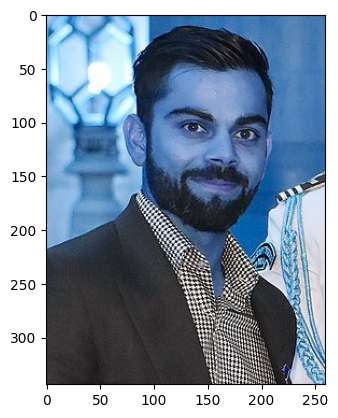

In [5]:
plt.imshow(img)

In [7]:
gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray_image.shape

(344, 260)

In [9]:
gray_image

array([[215, 214, 214, ..., 130, 130, 130],
       [214, 215, 215, ..., 130, 130, 130],
       [214, 215, 217, ..., 132, 132, 132],
       ...,
       [ 57,  52,  55, ..., 140, 231, 195],
       [ 54,  50,  54, ..., 112, 170, 126],
       [ 51,  47,  52, ..., 122, 159, 181]], dtype=uint8)

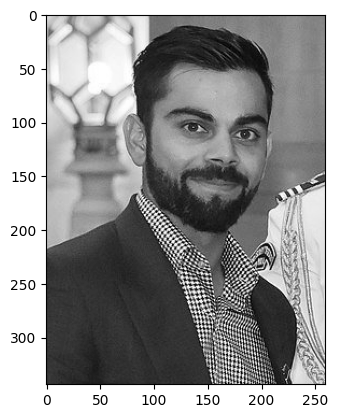

In [11]:
plt.imshow(gray_image,cmap = 'gray')

# Face and Detection Using HAAR Cascades

In [13]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [15]:
faces = face_cascade.detectMultiScale(gray_image,1.3,5)
faces # x,y,width,height

array([[ 85,  50, 145, 145]])

In [17]:
(x,y,w,h) = faces[0]
x,y,w,h

(85, 50, 145, 145)

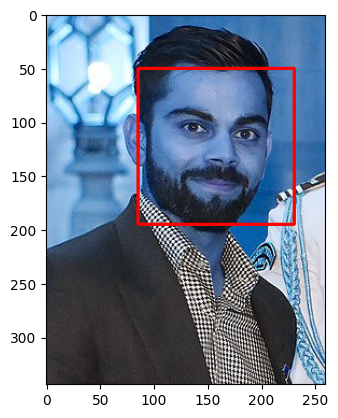

In [19]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)
# Draw a reactangle from this starting coordinate to this ending coordinate with this color

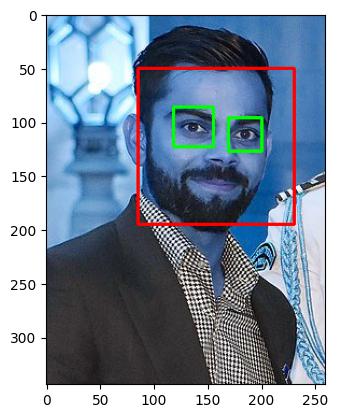

In [21]:
for (x,y,w,h) in faces:
    face_image = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # REGION OF INTERESTS
    roi_gray_image = gray_image[y:y+h,x:x+h]
    roi_color = face_img[y:y+h,x:x+h]
    eyes = eye_cascade.detectMultiScale(roi_gray_image)

    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_image,cmap='gray')
plt.show()

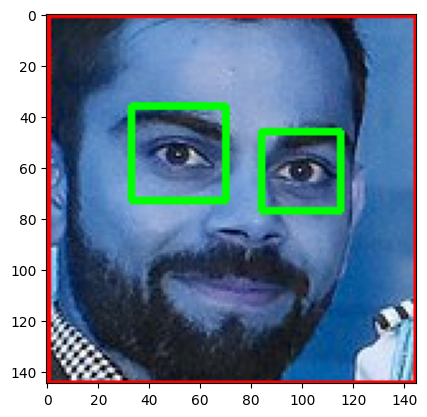

In [23]:
%matplotlib inline
plt.imshow(roi_color,cmap = 'gray')

In [25]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+h]
        roi_color = img[y:y+w, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray_image)
        if len(eyes) >=2:
            return roi_color

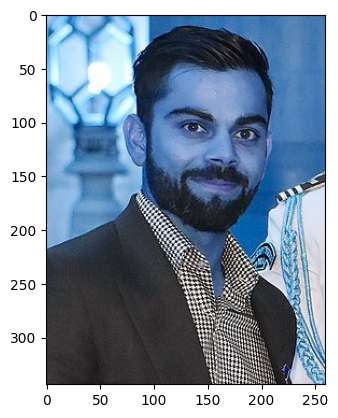

In [29]:
original_image = cv2.imread('C:/Users/VALLABH KULKARNI/Documents/Celebrity Classification Project/model/test images/virat1.jpg')
plt.imshow(original_image)

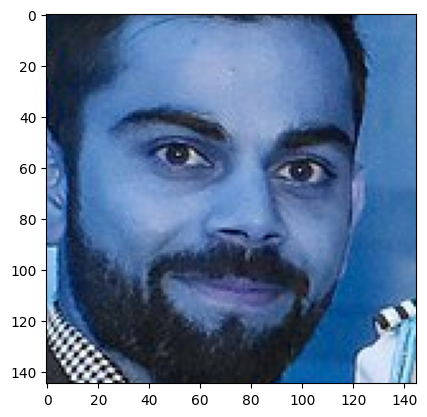

In [31]:
cropped_image = get_cropped_image_if_2_eyes('C:/Users/VALLABH KULKARNI/Documents/Celebrity Classification Project/model/test images/virat1.jpg')
plt.imshow(cropped_image)

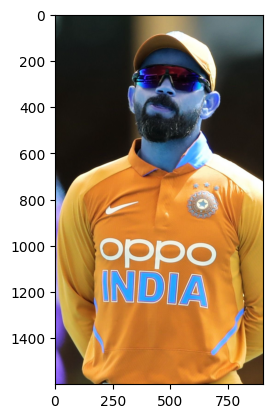

In [33]:
org_image_obstructed = cv2.imread('C:/Users/VALLABH KULKARNI/Documents/Celebrity Classification Project/model/test images/virat2.jpg')
plt.imshow(org_image_obstructed)

In [35]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('C:/Users/VALLABH KULKARNI/Documents/Celebrity Classification Project/model/test images/virat2.jpg')
cropped_image_no_2_eyes 

THE NO OUTPUT SHOWS THAT THE IMAGE IS OBSTRUCTED AND WE DON'T WANT SUCH IMAGE IN OUR TRAINING DATA

In [38]:
path_to_data = "./images_dataset/"
path_to_cropped_data = "./images_dataset/cropped/"

In [40]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [42]:
img_dirs

['./images_dataset/cropped',
 './images_dataset/lionel_messi',
 './images_dataset/maria_sharapova',
 './images_dataset/roger_federer',
 './images_dataset/serena_williams',
 './images_dataset/virat_kohli']

In [44]:
import shutil 
# IF EXISTS REMOVE IT 
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
# IF NOT EXISTS CREATE IT
os.mkdir(path_to_cropped_data)

In [46]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    # print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating Cropped images in folder : ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating Cropped images in folder :  ./images_dataset/cropped/lionel_messi
Generating Cropped images in folder :  ./images_dataset/cropped/maria_sharapova
Generating Cropped images in folder :  ./images_dataset/cropped/roger_federer
Generating Cropped images in folder :  ./images_dataset/cropped/serena_williams
Generating Cropped images in folder :  ./images_dataset/cropped/virat_kohli


In [48]:
# WE CAN GIVE MICRO TASKS TO CROWD LIKE MANUAL DATA CLEANING
# IT WILL REDUCE OUR TASK TO REMOVE IRRELATIVE IMAGES

# Wavelet Transforms for Feature Extraction 

In [51]:
import numpy as np
import pywt
import cv2 as cv

In [53]:
def w2d(img, mode='haar', level=1):
    imArray = img

    # DATATYPE CONVERSIONS
    # CONVERT TO GRAYSCALE
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)

    # CONVERT TO FLOAT
    imArray = np.float32(imArray)
    imArray /= 255;

    # COMPUTE COEFFICIENTS
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    # PROCESS COEFFICIENT
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;

    # RECONSTRUCTION
    imArray_H = pywt.waverec2(coeffs_H,mode)
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)

    return imArray_H

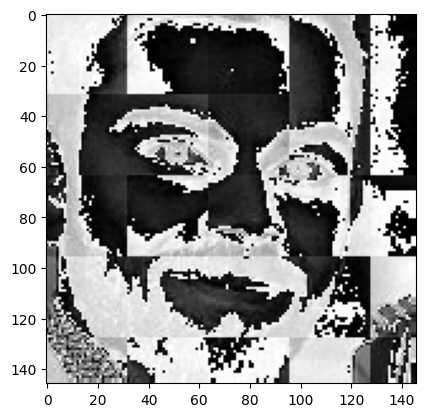

In [55]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

We are going to give input to our model as a stack of this wavelet transformed image with the raw image. It is because the raw image also contains some features. So we combine both the images. That is, we vertically stack these images 

In [59]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./images_dataset/cropped/lionel_messi\\lionel_messi1.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi10.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi11.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi12.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi15.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi16.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi17.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi18.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi19.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi2.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi20.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi21.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi22.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi23.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi25.png',
  './images_dataset/cropped/lionel_messi\

In [61]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [63]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har,(32,32))
        
        # VERTICALLY STACK THESE IMAGES USING NUMPY
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [65]:
len(X) # Input images number

204

In [67]:
len(y) # Output label number 

204

In [71]:
len(X[0]) # 32*32*3 + 32*32 = 4096

4096

In [75]:
y[0]

0

In [77]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [79]:
# CONVERT TO FLOAT to avoid warnings by SKLEARN
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(204, 4096)

In [81]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.])

### DATA CLEANING IS DONE.
#### Now we will train our model
We will use SVM with rbf kernel tuned with heuristic finetuning

In [83]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state =0)

# Now we will scale our data first
pipe = Pipeline([('scalar',StandardScaler()),('svc',SVC(kernel = 'linear', C=10))])

pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8823529411764706

In [87]:
len(X_test)

51

In [89]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.85      1.00      0.92        11
           2       0.73      0.89      0.80         9
           3       0.86      0.75      0.80         8
           4       1.00      1.00      1.00        12

    accuracy                           0.88        51
   macro avg       0.89      0.87      0.87        51
weighted avg       0.90      0.88      0.88        51



### Let's use GridSearch to try out different models with different parameters.
#### Goal is to come up with the best model with best fine tuned parameters

In [92]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [94]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [96]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.862796,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.692473,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.856129,{'logisticregression__C': 1}


In [98]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [100]:
best_estimators['svm'].score(X_test,y_test)

0.8823529411764706

In [102]:
best_estimators['random_forest'].score(X_test,y_test)

0.6862745098039216

In [104]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8235294117647058

In [106]:
#Best Classifier
best_clf = best_estimators['svm']

In [108]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 8,  1,  2,  0,  0],
       [ 0, 11,  0,  0,  0],
       [ 0,  0,  8,  1,  0],
       [ 0,  1,  1,  6,  0],
       [ 0,  0,  0,  0, 12]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

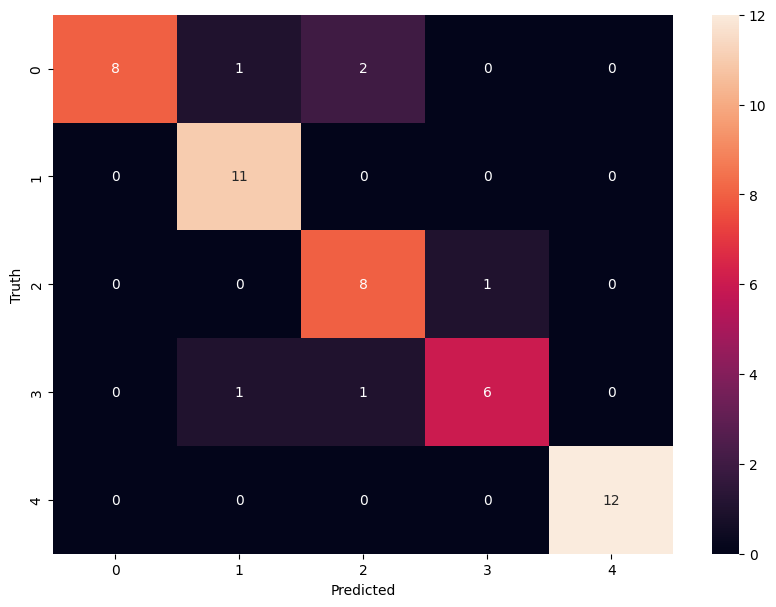

In [110]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [112]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

### Save the Trained Model

In [116]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

Defaulting to user installation because normal site-packages is not writeable


['saved_model.pkl']

### Save Class Dictionary

In [119]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))